In [1]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math
from urllib.request import urlopen

In [2]:
start = time.time()
time.sleep(5)
end = time.time()
end - start

5.000556945800781

In [3]:
eda_df = pd.read_csv('Jackie/first150.csv')

In [4]:
eda_df

,Unnamed: 0,thread_title,comment_author,date,comment
0,0,REPORTING AND EXECUTION OF BUMPER CLONES AND A...,Emperor_Hippo,"04-11-2018, 10:12 AM","Dear all, In view of recent bumper clone atta..."
1,0,**[IMPORTANT] EDMW Must-reads!**,leinad,"23-06-2008, 09:56 PM","1) Discrimination of Race, Culture, Derogatory..."
2,1,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"23-06-2008, 11:50 PM","Dear EDMWers, I would like to remind all of y..."
3,3,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"20-02-2011, 07:28 PM",Amended Infraction Points System and Banning P...
4,4,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"20-02-2011, 09:14 PM",2 points: - Thread Digging or Rubbish/Nuisanc...
...,...,...,...,...,...
157968,9989,[AMA] I am - Part 8,mgx-alander,"31-05-2020, 02:59 PM",sumi want to continue to exploit the banagala
157969,9991,[AMA] I am - Part 8,Sumimasen,"31-05-2020, 03:03 PM",They are paid to work here leh. Not free la...
157970,9992,[AMA] I am - Part 8,Dangojr,"31-05-2020, 03:04 PM",tot she wants with bangala
157971,9996,[AMA] I am - Part 8,chrislayer,"31-05-2020, 04:21 PM",Where is everybody..Zzzz


In [5]:
eda_sorted_df = eda_df.copy()
eda_sorted_df = eda_sorted_df.sort_values(by=['thread_title', 'date']).reset_index(drop=True)
eda_sorted_df.head()

,Unnamed: 0,thread_title,comment_author,date,comment
0,0,Honkies are BACK in force to Protest!,wixxxx,"10-05-2020, 09:37 PM",Never give in....Never give up......jin satki ...
1,1,Honkies are BACK in force to Protest!,SKenny,"10-05-2020, 09:44 PM",The roaches are back!! Burn HK burns!!
2,3,Honkies are BACK in force to Protest!,xcodes,"10-05-2020, 09:47 PM",best is protest till independence ... commie c...
3,4,Honkies are BACK in force to Protest!,jdepaul2,"10-05-2020, 09:48 PM",okay noted
4,5,Honkies are BACK in force to Protest!,archetern,"10-05-2020, 09:51 PM",Can u explain to me how r they able to be inde...


In [6]:
unique_list_thread_title = np.unique(eda_sorted_df['thread_title'])
len(unique_list_thread_title)

145

In [28]:
import datetime 
datetime_object = datetime.datetime.now()
print(datetime_object)

2020-07-02 11:46:43.878716


In [7]:
eda_sorted_df['date'] = eda_sorted_df['date'].astype(str)
eda_sorted_df['date'].dtypes
post_freq= eda_sorted_df['date'].str.replace(',', '')
post_freq = post_freq.str.replace('PM','').replace('AM','')
post_freq

0         10-05-2020 09:37 
1         10-05-2020 09:44 
2         10-05-2020 09:47 
3         10-05-2020 09:48 
4         10-05-2020 09:51 
                ...        
157968    10-05-2020 10:36 
157969    10-05-2020 10:37 
157970    10-05-2020 10:39 
157971    10-05-2020 10:40 
157972    10-05-2020 11:01 
Name: date, Length: 157973, dtype: object

In [8]:
import datetime 
eda_sorted_df['date'] = eda_sorted_df['date'].str.replace('Yesterday', '18-06-2020')
eda_sorted_df['date'] = eda_sorted_df['date'].str.replace('Today', '19-06-2020')
day_of_week = []
for date in eda_sorted_df['date']:
    post_freq_2 = datetime.datetime.strptime(date, "%d-%m-%Y, %I:%M %p")
    day_of_week.append(post_freq_2)
day_of_week

[datetime.datetime(2020, 5, 10, 21, 37),
 datetime.datetime(2020, 5, 10, 21, 44),
 datetime.datetime(2020, 5, 10, 21, 47),
 datetime.datetime(2020, 5, 10, 21, 48),
 datetime.datetime(2020, 5, 10, 21, 51),
 datetime.datetime(2020, 5, 10, 21, 53),
 datetime.datetime(2020, 5, 10, 21, 54),
 datetime.datetime(2020, 5, 10, 22, 5),
 datetime.datetime(2020, 5, 10, 22, 6),
 datetime.datetime(2020, 5, 10, 22, 11),
 datetime.datetime(2020, 5, 10, 22, 15),
 datetime.datetime(2020, 5, 10, 22, 22),
 datetime.datetime(2020, 5, 10, 22, 24),
 datetime.datetime(2020, 5, 10, 22, 25),
 datetime.datetime(2020, 5, 10, 22, 29),
 datetime.datetime(2020, 5, 10, 22, 50),
 datetime.datetime(2020, 5, 10, 22, 53),
 datetime.datetime(2020, 5, 10, 22, 54),
 datetime.datetime(2020, 5, 10, 22, 55),
 datetime.datetime(2020, 5, 11, 20, 32),
 datetime.datetime(2020, 5, 11, 20, 35),
 datetime.datetime(2020, 5, 11, 20, 38),
 datetime.datetime(2020, 5, 11, 20, 39),
 datetime.datetime(2020, 5, 11, 20, 39),
 datetime.datetime

In [16]:
from datetime import datetime, timedelta
eda_sorted_df['Day of Week'] = pd.Series(day_of_week).dt.weekday_name
eda_sorted_df.tail(1000)

,Unnamed: 0,thread_title,comment_author,date,comment,Day of Week
156973,4206,post 1st meal of Day 1 Circuit Breaker,260Wolskel,"24-05-2020, 01:05 PM","Lolll, yours always atas and high ses though!",Sunday
156974,4207,post 1st meal of Day 1 Circuit Breaker,desiresale,"24-05-2020, 01:13 PM",Is . !,Sunday
156975,4208,post 1st meal of Day 1 Circuit Breaker,busfreaks,"24-05-2020, 01:17 PM","Yes have, Imo one of the nicer 1.",Sunday
156976,4209,post 1st meal of Day 1 Circuit Breaker,260Wolskel,"24-05-2020, 01:17 PM","Hahaaa, how was your lunch today?",Sunday
156977,4210,post 1st meal of Day 1 Circuit Breaker,desiresale,"24-05-2020, 01:23 PM",I'm only sharing cup noodles wif sis. Coz...,Sunday
...,...,...,...,...,...,...
157968,0,who gotch go pulau ubin to pray the dua pek go...,cap223,"10-05-2020, 10:36 PM",effective anot?,Sunday
157969,1,who gotch go pulau ubin to pray the dua pek go...,jdepaul2,"10-05-2020, 10:37 PM",dua pek gong dun understand singlish u pray ...,Sunday
157970,3,who gotch go pulau ubin to pray the dua pek go...,popdod,"10-05-2020, 10:39 PM",U pray 4D. Will tio 4D.,Sunday
157971,4,who gotch go pulau ubin to pray the dua pek go...,Quala98,"10-05-2020, 10:40 PM",Ask ah kam,Sunday


# Do average post/week frequency

Step 1: Find out the date of the earliest post you have + last post you have  <br /> 
Step 2: Find out how many days elasped in between  <br /> 
Step 3: Take the total messages by the user / days elapsed

Difficulties:
1. sort values were incorrect - 2008 not included  <br /> 
2. scraped based on threads, so some may feature previously active members who are no longer active.  <br /> 

In [31]:
eda_sorted_df.sort_values(by='date')

,Unnamed: 0,thread_title,comment_author,date,comment,Day of Week
15661,47,Advanced Happy New Year to all and some import...,wadsad,"01-01-2016, 01:14 AM",csn kana infraction because of +1. then cannot...,Friday
15662,48,Advanced Happy New Year to all and some import...,youcharkway,"01-01-2016, 01:32 AM","ahhhh, i see why now he always pew -1",Friday
15663,49,Advanced Happy New Year to all and some import...,cute_togepi,"01-01-2016, 01:34 AM","So wasted, now big boss say he wants the old +...",Friday
15664,50,Advanced Happy New Year to all and some import...,cute_togepi,"01-01-2016, 01:48 AM","Also, what will happen to the mod who started ...",Friday
15665,51,Advanced Happy New Year to all and some import...,Perisher,"01-01-2016, 01:55 AM","It's like that time during GE, many people kee...",Friday
...,...,...,...,...,...,...
152519,7529,[] How many will protest on Sunday? [Live Stre...,yenorc,"31-12-2019, 12:33 PM",Hong Kong policeman works off-duty as protest ...,Tuesday
31742,6616,Daily Local YUMMMMMMMY Food In Singapore !!!!!...,ccostagmont,"31-12-2019, 12:49 AM",Hi ses siol...,Tuesday
152520,7530,[] How many will protest on Sunday? [Live Stre...,SKenny,"31-12-2019, 12:52 PM",His face is fully masked and voice digital alt...,Tuesday
152521,7506,[] How many will protest on Sunday? [Live Stre...,tym733,"31-12-2019, 12:54 AM",,Tuesday


In [33]:
import datetime
x = datetime.datetime.combine(datetime.date(2008, 6, 23), 
                          datetime.time(11, 50))
# eda_sorted_df['time since'] = (eda_sorted_df['date'] - x).astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)


# Post activity of top commentors over the week

In [10]:
eda_count = eda_sorted_df['comment_author'].value_counts().nlargest(10)
eda_count

DOMHO7          5373
kaypohchee      5077
Eternal-fire    4194
xowithmilk      3856
WussRedXLi      3207
quirkyhill      3038
lemondrink      2217
mrclubbie       2102
ellen77         2039
*-**-*          1902
Name: comment_author, dtype: int64

Text(0.5, 1.0, 'Top 10 most frequent EDMW posters for the first 150 threads')

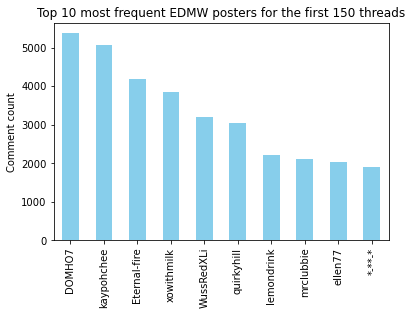

In [11]:
fig, ax = plt.subplots()
eda_count.plot(kind='bar', x='main_category', y='n', ax=ax, color='skyblue')
# Add the ylabel using ax.set_ylabel()
ax.set_ylabel("Comment count")
ax.set_title("Top 10 most frequent EDMW posters for the first 150 threads")

In [12]:
top_comment_df = eda_sorted_df[eda_sorted_df['comment_author'] == 'DOMHO7']
top_comment_df

,Unnamed: 0,thread_title,comment_author,date,comment,Day of Week
51937,5193,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:25 PM",Grizz u whack hard boil eggs song,Friday
51947,5203,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:52 PM",I nong time didn't take exams think sure damn ...,Friday
51948,5204,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:53 PM",I also hoot ntuc until song ah,Friday
51950,5206,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:57 PM",Muthu now stay another place ah. I can't meet ...,Friday
51953,5209,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 02:00 PM",I no boss I also cho sai kang ah Lai come ea...,Friday
...,...,...,...,...,...,...
142794,3360,[] Ah Gui Hotline - Part 6,DOMHO7,"31-03-2020, 08:36 PM",Ok after 30days hoot until u song ah,Tuesday
142799,3271,[] Ah Gui Hotline - Part 6,DOMHO7,"31-03-2020, 08:41 AM",Gd morn ah gui song song kao joo koon ah song ...,Tuesday
142804,3361,[] Ah Gui Hotline - Part 6,DOMHO7,"31-03-2020, 09:06 PM",Lai ah gui u storing power also. 49days.,Tuesday
142808,3363,[] Ah Gui Hotline - Part 6,DOMHO7,"31-03-2020, 09:17 PM",EF no need attend ICT liao ah. Song ah.,Tuesday


Text(0, 0.5, 'frequency')

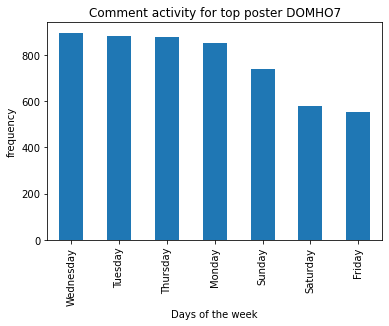

In [13]:
top_comment_count_df = top_comment_df['Day of Week'].str.split(expand=True).stack().value_counts().nlargest(7).plot.bar()
plt.title('Comment activity for top poster DOMHO7')
plt.xlabel('Days of the week')
plt.ylabel('frequency')


In [34]:
top_comment_2_df = eda_sorted_df[eda_sorted_df['comment_author'] == 'kaypohchee']
top_comment_2_df

,Unnamed: 0,thread_title,comment_author,date,comment,Day of Week
31478,6026,Daily Local YUMMMMMMMY Food In Singapore !!!!!...,kaypohchee,"29-08-2017, 03:18 AM",Registered Users cannot post or update lah,Tuesday
44105,3027,Home Cooking preferably LCHF Series - share id...,kaypohchee,"01-01-2018, 11:44 PM",1st Jan 2018 1st Meal is Chicken Drumstick Ri...,Monday
44106,3028,Home Cooking preferably LCHF Series - share id...,kaypohchee,"01-01-2018, 11:54 PM",Serving for mom + her saved excess chicken ric...,Monday
44107,5494,Home Cooking preferably LCHF Series - share id...,kaypohchee,"01-01-2019, 07:41 PM",Finally we finished the Fish Maw Soup (today ...,Tuesday
44108,0,Home Cooking preferably LCHF Series - share id...,kaypohchee,"01-02-2017, 10:18 PM",ADDED on Tues 10 Sep 2019 For T2D sufferers n...,Wednesday
...,...,...,...,...,...,...
157821,4539,post 1st meal of Day 1 Circuit Breaker,kaypohchee,"30-05-2020, 08:09 PM",Don't hv too high expectations there Cookie...,Saturday
157826,4542,post 1st meal of Day 1 Circuit Breaker,kaypohchee,"30-05-2020, 08:20 PM",Found the few pcs of pig stomach extremely tou...,Saturday
157828,4544,post 1st meal of Day 1 Circuit Breaker,kaypohchee,"30-05-2020, 08:24 PM",Maybe the liao not fresh So become tough etc ?...,Saturday
157833,4549,post 1st meal of Day 1 Circuit Breaker,kaypohchee,"30-05-2020, 08:30 PM",Jane seems pretty popular for the Thai std dis...,Saturday


Text(0, 0.5, 'frequency')

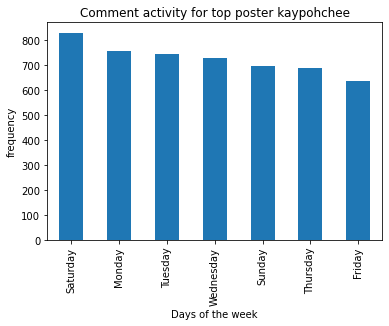

In [35]:
top_comment_count2_df = top_comment_2_df['Day of Week'].str.split(expand=True).stack().value_counts().nlargest(7).plot.bar()
plt.title('Comment activity for top poster kaypohchee')
plt.xlabel('Days of the week')
plt.ylabel('frequency')


In [36]:
top_comment_3_df = eda_sorted_df[eda_sorted_df['comment_author'] == 'Eternal-fire']
top_comment_3_df

,Unnamed: 0,thread_title,comment_author,date,comment,Day of Week
44085,24,Gvgt: this local video summarises life of a ty...,Eternal-fire,"11-05-2020, 12:11 AM",KNN this is best!,Monday
51344,361,Honestly sinkie girls really sux or because we...,Eternal-fire,"10-05-2020, 05:20 PM",Heng I bbfa and know my place. So no need to j...,Sunday
51598,259,Honestly sinkie girls really sux or because we...,Eternal-fire,"10-05-2020, 11:59 AM",Simps are farking disgusting,Sunday
51605,266,Honestly sinkie girls really sux or because we...,Eternal-fire,"10-05-2020, 12:03 PM",More like lack of discipline from NS.,Sunday
51606,267,Honestly sinkie girls really sux or because we...,Eternal-fire,"10-05-2020, 12:04 PM",At that age tell me who got that much wisdom? ...,Sunday
...,...,...,...,...,...,...
142834,3295,[] Ah Gui Hotline - Part 6,Eternal-fire,"31-03-2020, 11:12 AM",Asking for fun.,Tuesday
142835,3373,[] Ah Gui Hotline - Part 6,Eternal-fire,"31-03-2020, 11:28 PM",Bro this is bad,Tuesday
142841,3301,[] Ah Gui Hotline - Part 6,Eternal-fire,"31-03-2020, 11:50 AM",Wear birthday suit,Tuesday
153156,104,darkyy_whiteyy pig pig oink oink lazy corner,Eternal-fire,"29-07-2016, 01:12 PM",Are chiu in pain?,Friday


Text(0, 0.5, 'frequency')

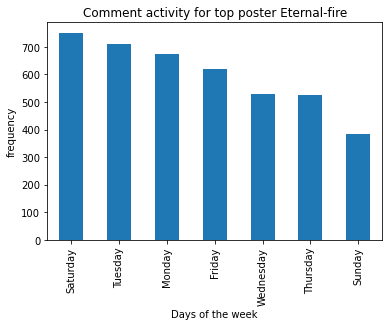

In [37]:
top_comment_count3_df = top_comment_3_df['Day of Week'].str.split(expand=True).stack().value_counts().nlargest(7).plot.bar()
plt.title('Comment activity for top poster Eternal-fire')
plt.xlabel('Days of the week')
plt.ylabel('frequency')


In [43]:
file_combined_df = pd.read_csv('file_combined.csv')

In [66]:
from wordcloud import WordCloud, STOPWORDS 
text = file_combined_df['comment']
text


0         Dear all,  In view of recent bumper clone atta...
1         1) Discrimination of Race, Culture, Derogatory...
2         Dear EDMWers,  I would like to remind all of y...
3         Amended Infraction Points System and Banning P...
4         2 points:  - Thread Digging or Rubbish/Nuisanc...
                                ...                        
405109                               2 more posts come come
405110                                                +1   
405111                                                  NaN
405112                     Heading to a new thread soon....
405113    Dear members, please take note that this threa...
Name: comment, Length: 405114, dtype: object

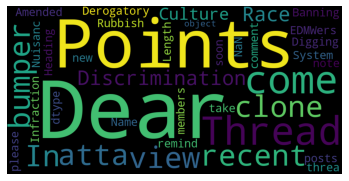

In [69]:
wordcloud = WordCloud(width = 1000, height = 500, max_words = 500).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## barplot of the frequency of their posts (use a groupyby) for top three most frequent posters - using size instead of count

In [132]:
eda_sorted2_df = eda_sorted_df.dropna()
eda_sorted2_df.reset_index(drop=True)

,Unnamed: 0,thread_title,comment_author,date,comment
0,0,Honkies are BACK in force to Protest!,wixxxx,"10-05-2020, 09:37 PM",Never give in....Never give up......jin satki ...
1,1,Honkies are BACK in force to Protest!,SKenny,"10-05-2020, 09:44 PM",The roaches are back!! Burn HK burns!!
2,3,Honkies are BACK in force to Protest!,xcodes,"10-05-2020, 09:47 PM",best is protest till independence ... commie c...
3,4,Honkies are BACK in force to Protest!,jdepaul2,"10-05-2020, 09:48 PM",okay noted
4,5,Honkies are BACK in force to Protest!,archetern,"10-05-2020, 09:51 PM",Can u explain to me how r they able to be inde...
...,...,...,...,...,...
156241,0,who gotch go pulau ubin to pray the dua pek go...,cap223,"10-05-2020, 10:36 PM",effective anot?
156242,1,who gotch go pulau ubin to pray the dua pek go...,jdepaul2,"10-05-2020, 10:37 PM",dua pek gong dun understand singlish u pray ...
156243,3,who gotch go pulau ubin to pray the dua pek go...,popdod,"10-05-2020, 10:39 PM",U pray 4D. Will tio 4D.
156244,4,who gotch go pulau ubin to pray the dua pek go...,Quala98,"10-05-2020, 10:40 PM",Ask ah kam


In [145]:
# Write your code here to created the aggregated df
sd_agg = eda_sorted2_df.groupby(['comment_author']).size().nlargest(10)
sd_agg

comment_author
DOMHO7          5373
kaypohchee      5077
Eternal-fire    4194
xowithmilk      3856
WussRedXLi      3207
quirkyhill      3038
lemondrink      2217
mrclubbie       2102
ellen77         2039
*-**-*          1902
dtype: int64

Text(0.5, 1.0, 'Number of projects by categories')

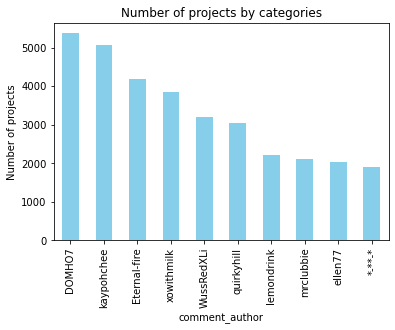

In [146]:
fig, ax = plt.subplots()
sd_agg.plot(kind='bar', x='main_category', y='n', ax=ax, color='skyblue')
# Add the ylabel using ax.set_ylabel()
ax.set_ylabel("Comment count")
ax.set_title("Top 10 most frequent EDMW posters for the first 150 threads")

# Latent Dirichlet Allocation with Gensim 

In [111]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from gensim import matutils, models
import scipy.sparse

In [110]:
# One of the required inputs is a term-document matrix
#tdm = eda_sorted_df.transpose()
#tdm.head()

In [114]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
import pickle
eda_sorted2_df = eda_sorted_df['comment'].astype(str)
eda_sorted2_df.to_pickle("./tdm.pkl")
data = pd.read_pickle('tdm.pkl')

In [115]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
data = np.array(data, dtype=str)
sparse_counts = scipy.sparse.csr_matrix(data)
corpus = matutils.Sparse2Corpus(sparse_counts)

MemoryError: Unable to allocate 31.6 GiB for an array with shape (157973,) and data type <U53776

In [116]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = pickle.load(open("____.pkl", "rb"))
#id2word = dict((v, k) for k, v in cv.vocabulary_.items())

C:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Text Analysis

In [56]:
import nltk

# Downloading word corpus
nltk.download('punkt') # STEMMING
nltk.download('averaged_perceptron_tagger') # < POS TAGGING
nltk.download('wordnet') # LEMMATISATION
nltk.download('stopwords') # STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
import re
def clean_names(title):
    title = re.sub("[.®'&$’\"\-()]", "", title)
    title = title.lower()
    title = title.strip()
    
    return title
    # return the title

In [ ]:
file_combined_df['comment'] = file_combined_df['comment'].apply(clean_names)
#file_combined_df

In [60]:
from nltk.tokenize import word_tokenize
# tokenize each title using list comprehension
song_titles = file_combined_df['comment'].tolist()
tokenized = []

for song in song_titles:
    tokenized.append(word_tokenize(song)) # < 
tokenized

TypeError: expected string or bytes-like object